In [2]:
#2. A company started to invest in digital marketing as a new way of their product promotions. For that they collected 
#data and decided to carry out a study on it.
#a. The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

import scipy.stats as stats
import pandas as pd
import numpy as np

data = pd.read_csv('Sales_add.csv')

alpha = 0.05
t_value,p_value = stats.ttest_ind(data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'])
if p_value < alpha:
    print('Reject null hypothesis: The digital marketing strategy has increased sales')
else:
    print('Do not reject null hypothesis: The digital marketing strategy does not have any effect on sales ')
    

Reject null hypothesis: The digital marketing strategy has increased sales


In [3]:
#b. The company needs to check whether there is any dependency between the features “Region” and “Manager”.

import statsmodels.api as sm
from statsmodels.formula.api import ols

data['Sales'] = data['Sales_After_digital_add(in $)']

sales_model = ols('Sales ~ C(Region):C(Manager) + C(Region) + C(Manager)',data = data).fit()
table = sm.stats.anova_lm(sales_model,typ = 2)
print(table)

                            sum_sq    df         F    PR(>F)
C(Region)             1.114049e+09   2.0  0.810150  0.466032
C(Manager)            2.568861e+09   2.0  1.868109  0.193579
C(Region):C(Manager)  8.388157e+08   4.0  0.304999  0.869479
Residual              8.938238e+09  13.0       NaN       NaN


In [7]:
alpha = 0.05
if table['PR(>F)'][2] < alpha:
    print('There is significant dependancy between the features "Region" and "Manager" ')
else:
    print('There is no significant dependancy between the features "Region" and "Manager" ')

There is no significant dependancy between the features "Region" and "Manager" 


In [9]:
#1. An Institution wishes to find out their student’s ability in mathematics, reading and writing skills. The Institution 
#wants to do an exploratory study to check the following information.
#a. Find out how many males and females participated in the test

score_data = pd.read_csv('Students_Performance.csv')
print(score_data.head())
print('\nThe number of students participated in the test based on gender :-')
score_data['gender'].value_counts()

   gender race/ethnicity parental level of education         lunch  \
0  female        group C            some high school  free/reduced   
1  female        group B                 high school  free/reduced   
2  female        group B            some high school  free/reduced   
3  female        group B                some college      standard   
4  female        group C                some college  free/reduced   

  test preparation course  math score  reading score  writing score  
0                    none           0             17             10  
1                    none           8             24             23  
2                    none          18             32             28  
3                    none          11             38             32  
4                    none          22             39             33  

The number of students participated in the test based on gender :-


female    518
male      482
Name: gender, dtype: int64

In [22]:
#b. What do you think about the students' parental level of education?

score_data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [23]:
print('Parental level of education is good')

Parental level of education is good


In [24]:
#c. Who scores the most on average for math, reading and writing based on
#i. Gender
#ii. Test preparation course

print('THE AVERAGES TABLE:')
score_data.groupby(by='gender')[['math score','reading score','writing score']].mean()

THE AVERAGES TABLE:


,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


math score          Axes(0.125,0.11;0.227941x0.77)
reading score    Axes(0.398529,0.11;0.227941x0.77)
writing score    Axes(0.672059,0.11;0.227941x0.77)
dtype: object

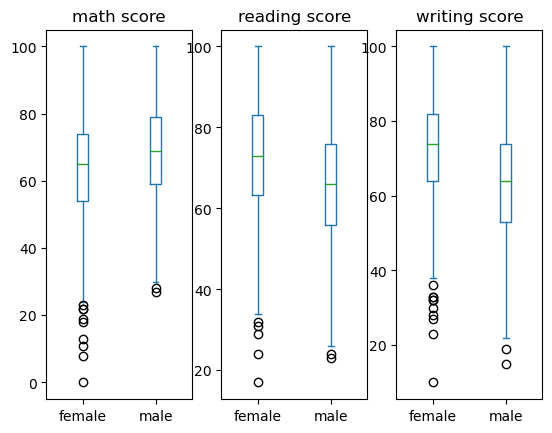

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
score_data.plot(kind='box',by = 'gender')

From the above plot we understand that male students scored more in maths whereas female students scored more in
reading and writing on average.

THE AVERAGES TABLE:
                         math score  reading score  writing score
test preparation course                                          
completed                  69.96648      74.175978      74.684358
none                       63.78972      66.417445      64.457944


math score          Axes(0.125,0.11;0.227941x0.77)
reading score    Axes(0.398529,0.11;0.227941x0.77)
writing score    Axes(0.672059,0.11;0.227941x0.77)
dtype: object

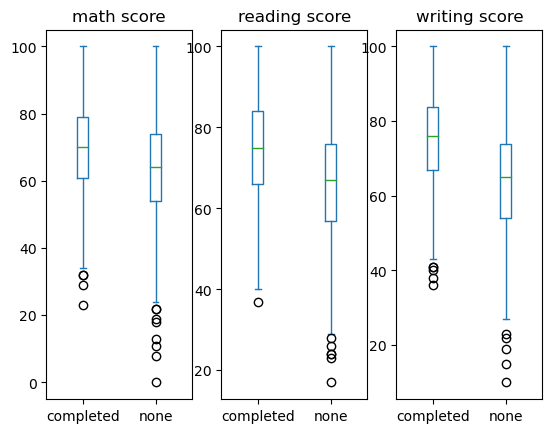

In [25]:
print('THE AVERAGES TABLE:')
print(score_data.groupby(by='test preparation course')[['math score','reading score','writing score']].mean())
score_data.plot(kind='box',by = 'test preparation course')


From the above plots we understand that students who completed the test preparation course scored more in maths,reading 
as well as writing on average.

In [26]:
# d. What do you think about the scoring variation for  math, reading and writing based on
#i. Gender
#ii. Test preparation course

print('THE VARIANCES TABLE:')
print(score_data.groupby(by='gender')[['math score','reading score','writing score']].var())
print(score_data.groupby(by='test preparation course')[['math score','reading score','writing score']].var())


THE VARIANCES TABLE:
        math score  reading score  writing score
gender                                          
female  256.958593     207.677438     220.369327
male    211.889097     200.211010     202.413924
                         math score  reading score  writing score
test preparation course                                          
completed                210.884027     183.265864     175.202612
none                     246.668662     213.419851     226.251739


Gender wise female scores varies more than males,
whereas based on test preparation ,score variation is more for those who did not complete test course

In [13]:
#e. The management needs your help to give bonus points to the top 25% of students based on their math score, 
#so how will you help the management to achieve this.

quartile_75 = score_data['math score'].quantile(q=0.75)
print('The below table contains the information of top 25% scorers in math:-')
score_data[score_data['math score'].ge(quartile_75)].sort_values(['math score'],ascending = False)


The below table contains the information of top 25% scorers in math:-


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
998,male,group E,associate's degree,free/reduced,completed,100,100,93
997,male,group D,some college,standard,completed,100,97,99
996,male,group A,some college,standard,completed,100,96,86
517,female,group E,associate's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
854,male,group D,some high school,standard,completed,77,68,69
855,male,group E,associate's degree,free/reduced,completed,77,69,68
856,male,group E,some high school,standard,completed,77,76,77
415,female,group B,master's degree,free/reduced,completed,77,97,94
